# Problem Statement

Car Data-
Here, we will apply k-means clustering for grouping the similar cars in one cluster

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Cars Data file into Python DataFrame and view top 10 rows.

Get the data from here - https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/

In [2]:
cars_df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original',sep="\s+",names=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name'])

In [3]:
cars_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [4]:
cars_df.dtypes

mpg             float64
cylinders       float64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model year      float64
origin          float64
car name         object
dtype: object

In [5]:
cars_df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [6]:
cars_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,406.000000,406.000000,400.000000,406.000000,406.000000,406.000000,406.000000
mean,23.514573,5.475369,194.779557,105.082500,2979.413793,15.519704,75.921182,1.568966
std,7.815984,1.712160,104.922458,38.768779,847.004328,2.803359,3.748737,0.797479
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,105.000000,75.750000,2226.500000,13.700000,73.000000,1.000000
50%,23.000000,4.000000,151.000000,95.000000,2822.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,302.000000,130.000000,3618.250000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


# Q3 Check for missing value check, incorrect data and perform imputation with mean, median, mode as necessary.

In [7]:
cars_df.isna().sum()

mpg             8
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [8]:
cars_df.isnull().sum()

mpg             8
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [9]:
cars_df.isin([0]).sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [10]:
cars_df['mpg']=cars_df['mpg'].fillna(cars_df['mpg'].median())

In [11]:
cars_df['horsepower']=cars_df['horsepower'].fillna(cars_df['horsepower'].median())

In [12]:
cars_df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences

C:\Users\Veni\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


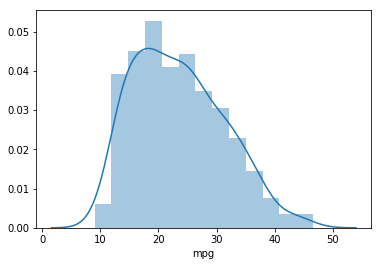

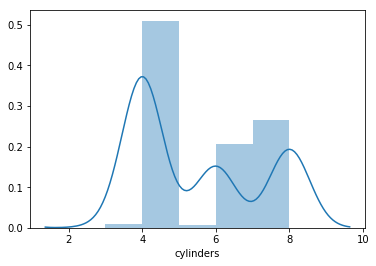

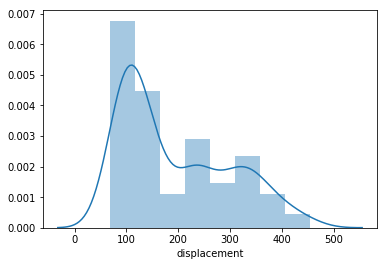

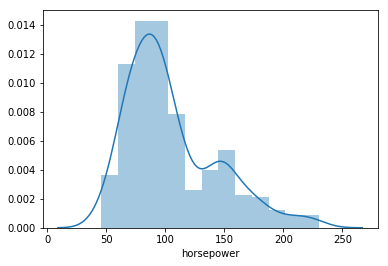

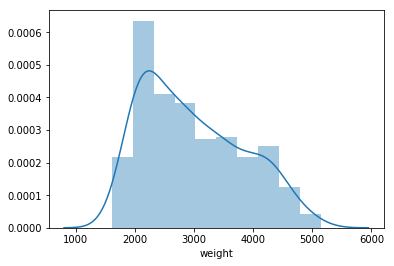

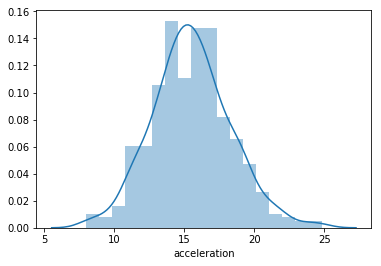

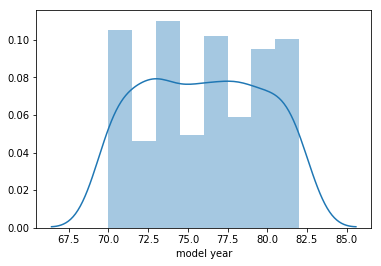

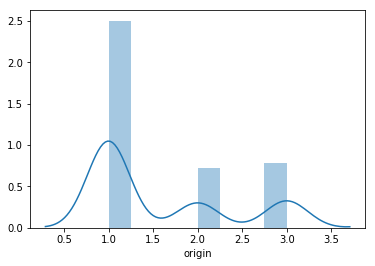

In [13]:
import seaborn as sns
hist_df=cars_df.drop(columns=['car name'])
for i,col in enumerate(hist_df.columns):
    plt.figure(i)
    sns.distplot(hist_df[col])
    

In [14]:
cars_df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.763451,-0.792077,-0.760926,-0.823985,0.410449,0.567223,0.561354
cylinders,-0.763451,1.000000,0.951787,0.842307,0.895220,-0.522452,-0.360762,-0.567478
displacement,-0.792077,0.951787,1.000000,0.896703,0.932475,-0.557984,-0.381714,-0.613056
horsepower,-0.760926,0.842307,0.896703,1.000000,0.864369,-0.694415,-0.421699,-0.457162
weight,-0.823985,0.895220,0.932475,0.864369,1.000000,-0.430086,-0.315389,-0.584109
acceleration,0.410449,-0.522452,-0.557984,-0.694415,-0.430086,1.000000,0.301992,0.218845
model year,0.567223,-0.360762,-0.381714,-0.421699,-0.315389,0.301992,1.000000,0.187656
origin,0.561354,-0.567478,-0.613056,-0.457162,-0.584109,0.218845,0.187656,1.000000


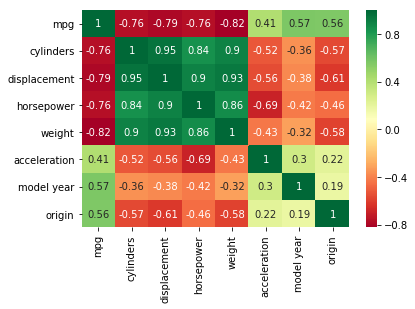

In [15]:
sns.heatmap(cars_df.corr(),annot=True,cmap='RdYlGn')

In [16]:
#Observations
# MPG doesn't have much relation with cylinders, displacement, horsepower and weight and so average relation with acceleration
# cylinder, displacement, horsepower, wieght having good relations among on each other
# There is some positive coorelatio between mpg and origin


# Q5. Perform any feature engineering/transformation and remove any duplicate or irrelevant columns

In [17]:
# Further dig into data shows max mpd is for 4 cylinders vehicles
# Origin as pointed earlier indicates production point so should be broken into dummy variables
# Year would be more effective if we can transorm this to calculate age of vehicle. This dataset was used in 1983 so we would 
         #subtract year from 83 to get the age
cars_df[cars_df['cylinders']>4][['mpg','cylinders']]

,mpg,cylinders
0,18.0,8.0
1,15.0,8.0
2,18.0,8.0
3,16.0,8.0
4,17.0,8.0
5,15.0,8.0
6,14.0,8.0
7,14.0,8.0
8,14.0,8.0
9,15.0,8.0


In [18]:
dummies=pd.get_dummies(cars_df['origin'])


In [19]:
cars_df=pd.concat([cars_df,dummies],axis=1)

In [20]:
cars_df=cars_df.drop(columns=['origin'])


In [21]:
cars_df['Age']=83.0-cars_df['model year']
cars_df=cars_df.drop(columns='model year')

In [22]:
cars_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,car name,1.0,2.0,3.0,Age
0,18.0,8.0,307.0,130.0,3504.0,12.0,chevrolet chevelle malibu,1,0,0,13.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,buick skylark 320,1,0,0,13.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,plymouth satellite,1,0,0,13.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,amc rebel sst,1,0,0,13.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,ford torino,1,0,0,13.0


In [23]:
le=LabelEncoder()
le.fit(cars_df['car name'])
cars_df['car name']=le.transform(cars_df['car name'])

# Q6. Create new data frame with standardize variables and imputation for any missing/outliers

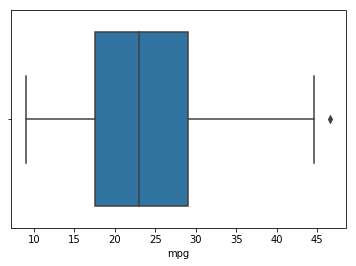

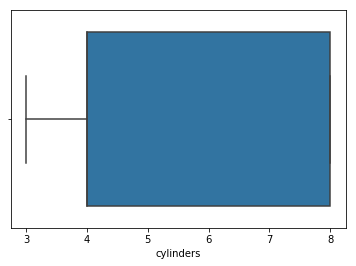

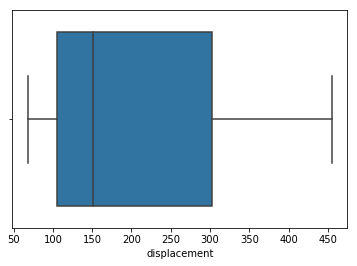

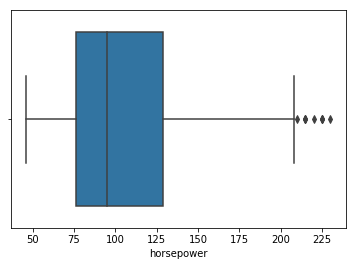

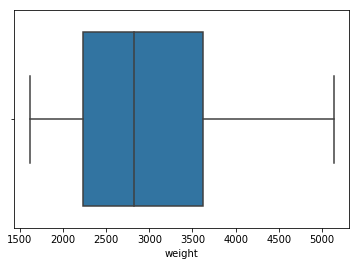

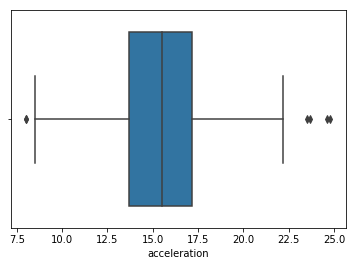

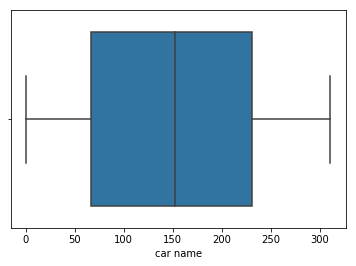

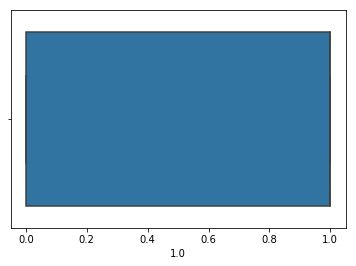

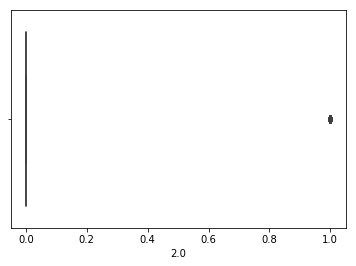

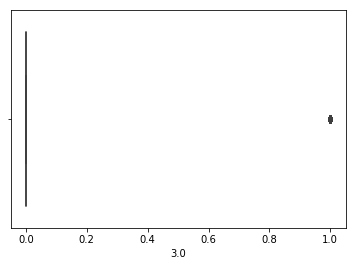

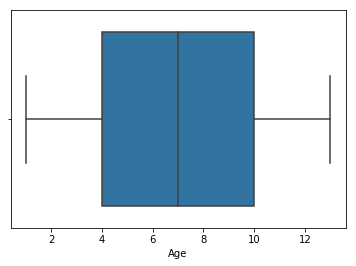

In [24]:
# Missing value check was done above and hp column was treated with median values
# Let us check for outliers now

for i,col in enumerate(cars_df.columns):
    plt.figure(i)
    sns.boxplot(cars_df[col])
    
# i see most of them Extrene values


In [25]:
from scipy.stats import zscore

In [26]:
cars_df=cars_df.apply(zscore)

# Q7. Create appropriate clusters with the new data set

In [27]:
cluster_range = range( 1, 10)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans( num_clusters, n_init = 5)
    clusters.fit(cars_df)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,4466.000000
1,2,2622.275083
2,3,2112.289211
3,4,1488.565024
4,5,1287.628904
5,6,1205.378932
6,7,1129.296714
7,8,1049.385267
8,9,986.630284


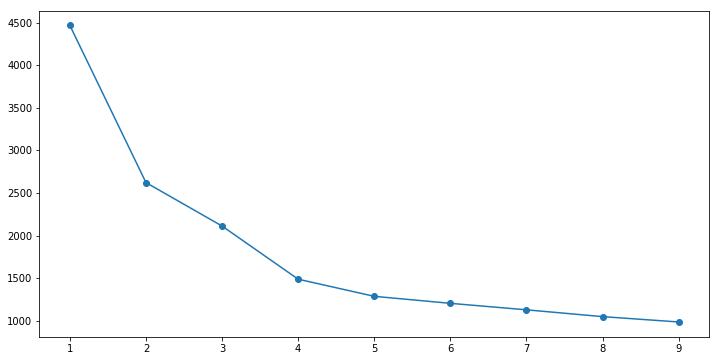

In [28]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

# Q8. Identify the appropriate clusters with result from above question

In [29]:
#optimal k value is 4
kmeans=KMeans(n_clusters=4,random_state=1)
kmeans.fit(cars_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

# Q9. Check for no of values in each cluster and centers for each variables. 

In [30]:
kmeans.cluster_centers_

array([[ 0.89869586, -0.80354599, -0.87859449, -0.65270512, -0.89624265,
         0.23302492,  0.40211662, -1.29269201, -0.46820852,  2.03451235,
        -0.40646576],
       [-1.08612928,  1.46521053,  1.44785404,  1.44767441,  1.34417557,
        -1.03904561, -0.36099383,  0.77357947, -0.46820852, -0.49151827,
         0.6275854 ],
       [ 0.5415797 , -0.77464677, -0.81411611, -0.61244443, -0.64769052,
         0.46509211,  0.73470076, -1.29269201,  2.13580051, -0.49151827,
         0.04846435],
       [ 0.02356566, -0.22696482, -0.15560559, -0.37405144, -0.15472388,
         0.38079931, -0.31876521,  0.77357947, -0.46820852, -0.49151827,
        -0.25049376]])

In [31]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 3,
       3, 3, 0, 2, 2, 2, 2, 2, 3, 1, 1, 1, 1, 0, 3, 0, 3, 2, 3, 3, 3, 3,
       3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 2, 2, 2, 0, 0, 2, 3, 0, 3,
       2, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3,
       0, 0, 3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 2,
       1, 1, 1, 1, 3, 0, 3, 0, 0, 3, 3, 2, 1, 1, 2, 2, 2, 2, 1, 2, 0, 1,
       3, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 3,
       2, 2, 0, 0, 2, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 1, 1, 0, 3,
       3, 3, 0, 2, 0, 3, 2, 3, 2, 2, 2, 2, 0, 2, 2, 3, 3, 2, 1, 1, 1, 1,
       3, 3, 3, 3, 3, 3, 2, 0, 3, 3, 3, 3, 2, 0, 0, 3, 2, 1, 2, 0, 2, 1,
       1, 1, 1, 0, 3, 2, 3, 0, 1, 3, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 2, 3,
       0, 3, 3, 3, 0, 2, 0, 2, 0, 2, 3, 0, 0, 0, 3, 1, 1, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 0, 0, 3, 0, 3, 3, 0, 2, 2, 2, 2, 2,
       0, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2,

# Q10. Assign the groups created above to data frame and study the characteristics  for each group.

In [32]:
#cars_df['labels']=kmeans.labels_

In [33]:
cars_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,car name,1.0,2.0,3.0,Age
0,-0.712161,1.476349,1.070876,0.651885,0.620107,-1.257080,-1.112175,0.773579,-0.468209,-0.491518,1.581463
1,-1.100299,1.476349,1.481208,1.562102,0.843522,-1.435658,-1.254369,0.773579,-0.468209,-0.491518,1.581463
2,-0.712161,1.476349,1.175844,1.172009,0.539725,-1.614235,0.911357,0.773579,-0.468209,-0.491518,1.581463
3,-0.970920,1.476349,1.042248,1.172009,0.536179,-1.257080,-1.505943,0.773579,-0.468209,-0.491518,1.581463
4,-0.841540,1.476349,1.023163,0.911947,0.555092,-1.792813,0.134758,0.773579,-0.468209,-0.491518,1.581463


In [34]:
center_df=pd.DataFrame(kmeans.cluster_centers_,columns=list(cars_df.columns))

In [35]:
center_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,car name,1.0,2.0,3.0,Age
0,0.898696,-0.803546,-0.878594,-0.652705,-0.896243,0.233025,0.402117,-1.292692,-0.468209,2.034512,-0.406466
1,-1.086129,1.465211,1.447854,1.447674,1.344176,-1.039046,-0.360994,0.773579,-0.468209,-0.491518,0.627585
2,0.541580,-0.774647,-0.814116,-0.612444,-0.647691,0.465092,0.734701,-1.292692,2.135801,-0.491518,0.048464
3,0.023566,-0.226965,-0.155606,-0.374051,-0.154724,0.380799,-0.318765,0.773579,-0.468209,-0.491518,-0.250494


In [36]:
cars_df['labels']=kmeans.labels_

In [37]:
cars_df['labels'].value_counts()

3    149
1    105
0     79
2     73
Name: labels, dtype: int64

In [38]:
# Export the data into csv for any further analysis

from pandas import ExcelWriter
writer = ExcelWriter('d:\groups.xls')
cars_df.to_excel(writer,'Sheet1')
writer.save()

In [ ]:
# We can try similar analysis for 3 grps as well to check if we get more clear distinction among groups